In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import plotly.express as px
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
datafolder = '../data/data-10k/'

In [8]:
titlebasics= 'title.basics-10k.tsv'

In [9]:
df= pd.read_csv(datafolder + titlebasics, sep='\t', quoting = 3)

In [10]:
from unidecode import unidecode

for col in df.columns :
    df["primaryTitle"] = df["primaryTitle"].apply(lambda x: unidecode(x))
    df["originalTitle"] = df["originalTitle"].apply(lambda x: unidecode(x))
    df["genres"] = df["genres"].apply(lambda x: unidecode(x))

df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [29]:
df_null = df.replace(r"\N", None ) 

<Axes: >

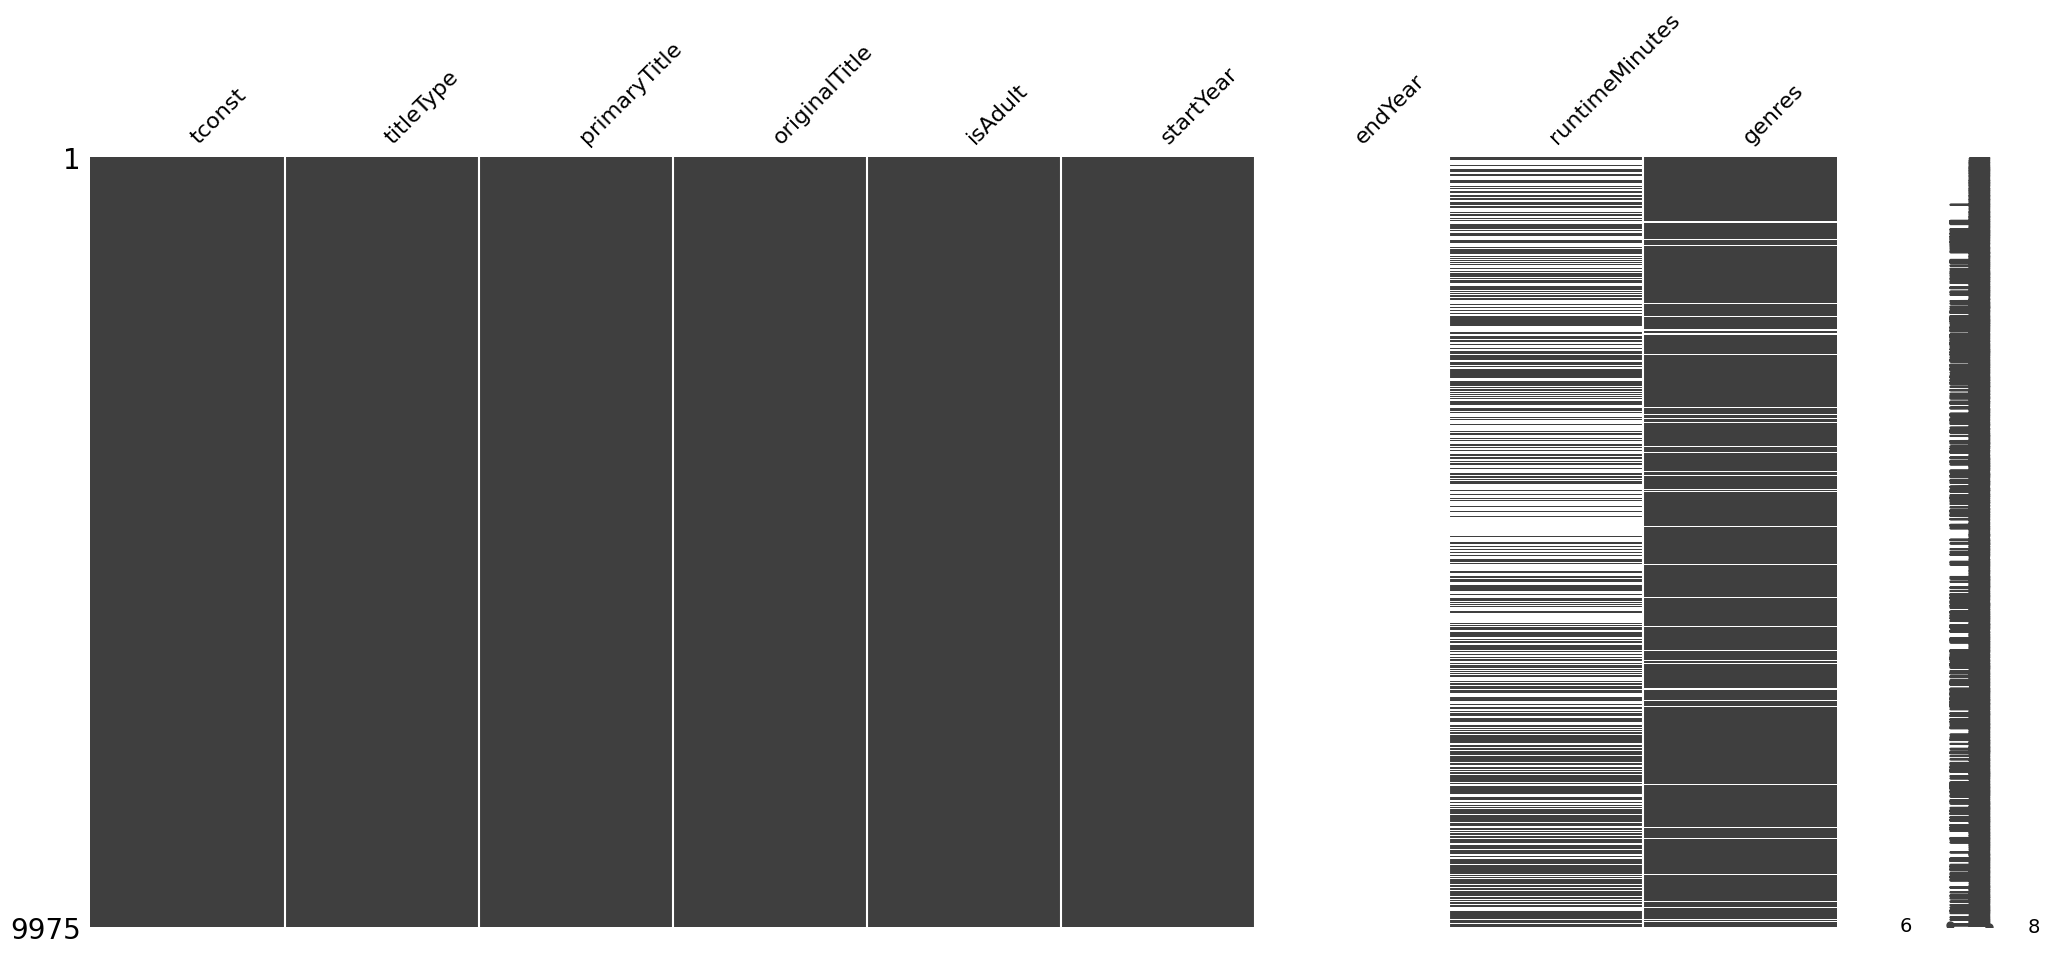

In [31]:
import missingno as msno
msno.matrix(df_null)

In [11]:
df["tconst"].nunique()

9999

In [12]:
df["titleType"].value_counts(normalize=True)


titleType
short    0.579358
movie    0.420642
Name: proportion, dtype: float64

In [32]:
data = {'titleType': ['short', 'movie'], 'proportion': [0.579358, 0.420642]}
df_proportions = pd.DataFrame(data)

# Création du graphique
fig = px.pie(df_proportions, values='proportion', names='titleType', 
             title="Répartition des titres")
fig.show()


In [14]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [15]:
df[["primaryTitle" , "startYear", "runtimeMinutes"]].value_counts()

primaryTitle                startYear  runtimeMinutes
Mutt and Jeff               1913       \N                15
Hamlet                      1908       \N                 3
Devil Dogs                  1918       \N                 2
Mexican War Pictures        1913       \N                 2
Lena Rivers                 1914       \N                 2
                                                         ..
Zaragoza y sus monumentos   1913       10                 1
Zaza                        1915       50                 1
Zhenshchina vampir          1915       \N                 1
Zhizn trekh dney            1917       \N                 1
!Cuidado con los ladrones!  1919       \N                 1
Name: count, Length: 9971, dtype: int64

In [16]:
df["primaryTitle"]=="Mutt and Jeff"

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: primaryTitle, Length: 9999, dtype: bool

In [17]:
duplicates = df[df[["primaryTitle", "startYear", "runtimeMinutes", "genres"]].duplicated(keep=False)]

duplicate_indices = duplicates.index.tolist()

print("\nLignes dupliquées :")
print(duplicates)



Lignes dupliquées :
         tconst titleType                     primaryTitle  \
276   tt0000279     short  Buffalo Bill's Wild West Parade   
277   tt0000280     short  Buffalo Bill's Wild West Parade   
626   tt0000631     short                           Hamlet   
939   tt0000950     short                          Macbeth   
1230  tt0001242     short                           Hamlet   
1287  tt0001299     short                          Macbeth   
2378  tt0002405     movie                     Oliver Twist   
2379  tt0002406     movie                     Oliver Twist   
3110  tt0003139     movie             Mexican War Pictures   
3111  tt0003140     movie             Mexican War Pictures   
3151  tt0003180     short                    Mutt and Jeff   
3152  tt0003181     short                    Mutt and Jeff   
3153  tt0003182     short                    Mutt and Jeff   
3154  tt0003183     short                    Mutt and Jeff   
3155  tt0003184     short                    Mutt

In [18]:
df = df.drop_duplicates(subset=["primaryTitle", "startYear", "runtimeMinutes", "genres"])
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [19]:
df["tconst"].nunique()

9975

In [34]:
df.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [47]:
df['startYear'] = df['startYear'].replace(r'\\N', np.nan, regex=True)
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df['runtimeMinutes'] = df['runtimeMinutes'].replace(r'\\N', np.nan, regex=True)
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

In [48]:
df["isAdult"] = df["isAdult"].astype(bool)
df["startYear"] = df["startYear"].astype(float)
df["runtimeMinutes"] = df["runtimeMinutes"].astype(float)

In [49]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult              bool
startYear         float64
endYear            object
runtimeMinutes    float64
genres             object
dtype: object

In [50]:
df['liste_genre'] = df['genres'].str.split(',')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,liste_genre
0,tt0000001,short,Carmencita,Carmencita,False,1894.0,\N,1.0,"Documentary,Short","[Documentary, Short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,False,1892.0,\N,5.0,"Animation,Short","[Animation, Short]"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,False,1892.0,\N,5.0,"Animation,Comedy,Romance","[Animation, Comedy, Romance]"
3,tt0000004,short,Un bon bock,Un bon bock,False,1892.0,\N,12.0,"Animation,Short","[Animation, Short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,False,1893.0,\N,1.0,Short,[Short]


In [53]:
count_liste_genre = df["liste_genre"].explode().tolist()

In [54]:
compte_genre = Counter(count_liste_genre)
compte_genre

Counter({'Short': 5683,
         'Drama': 4740,
         'Comedy': 2844,
         'Western': 828,
         'Romance': 728,
         '\\N': 552,
         'Documentary': 384,
         'Animation': 379,
         'Crime': 372,
         'Adventure': 263,
         'War': 229,
         'Action': 157,
         'Fantasy': 153,
         'Mystery': 138,
         'History': 121,
         'Horror': 86,
         'Thriller': 72,
         'Biography': 49,
         'Family': 40,
         'Sport': 32,
         'Sci-Fi': 28,
         'News': 15,
         'Music': 12,
         'Musical': 2})

In [55]:
df["startYear"].sort_values(ascending =True)

1       1892.0
2       1892.0
3       1892.0
4       1893.0
0       1894.0
         ...  
5856    1925.0
3816    1936.0
965     1990.0
919     1990.0
619        NaN
Name: startYear, Length: 9975, dtype: float64

In [56]:
df["startYear"].sort_values(ascending =False)

919     1990.0
965     1990.0
3816    1936.0
5013    1925.0
5793    1925.0
         ...  
4       1893.0
2       1892.0
1       1892.0
3       1892.0
619        NaN
Name: startYear, Length: 9975, dtype: float64

In [57]:
df["runtimeMinutes"].sort_values(ascending =True)

0       1.0
147     1.0
28      1.0
29      1.0
30      1.0
       ... 
9976    NaN
9978    NaN
9994    NaN
9995    NaN
9998    NaN
Name: runtimeMinutes, Length: 9975, dtype: float64

In [58]:
df["runtimeMinutes"].sort_values(ascending =False)

4009    1428.0
8901     600.0
9766     489.0
8350     480.0
8170     460.0
         ...  
9976       NaN
9978       NaN
9994       NaN
9995       NaN
9998       NaN
Name: runtimeMinutes, Length: 9975, dtype: float64

In [59]:
df.iloc[4009]

tconst                   tt0004073
titleType                    short
primaryTitle      Her First Lesson
originalTitle     Her First Lesson
isAdult                      False
startYear                   1914.0
endYear                         \N
runtimeMinutes                 NaN
genres                Comedy,Short
liste_genre        [Comedy, Short]
Name: 4030, dtype: object

In [60]:
df.iloc[8901]

tconst               tt0009052
titleType                movie
primaryTitle      Fallen Angel
originalTitle     Fallen Angel
isAdult                  False
startYear               1918.0
endYear                     \N
runtimeMinutes            50.0
genres                   Drama
liste_genre            [Drama]
Name: 8923, dtype: object

In [69]:
# des erreurs au niveau des runtimeminutes... donc analyse complémentaire

In [64]:
temps_par_type=df.groupby("titleType")["runtimeMinutes"]

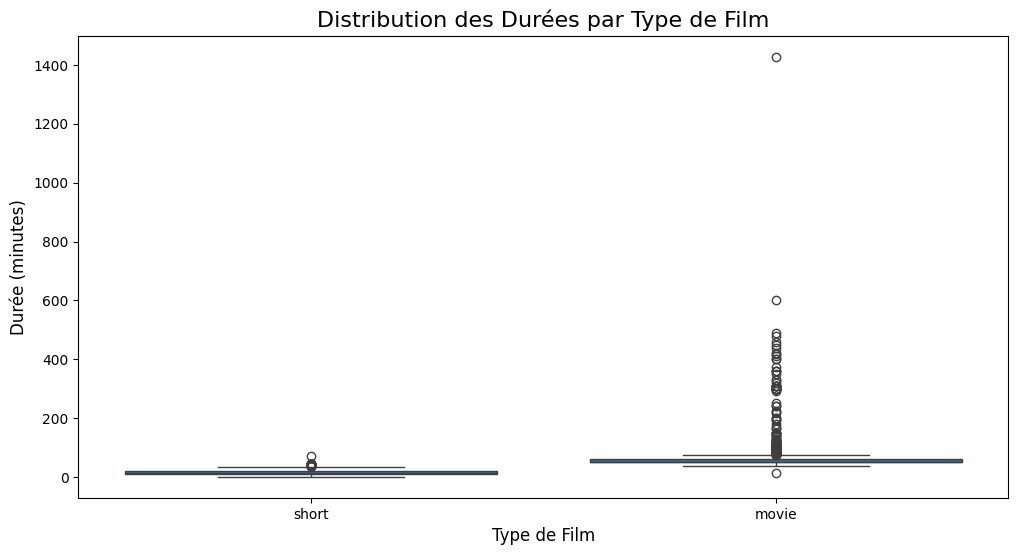

In [67]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="titleType", y="runtimeMinutes", data=df)
plt.title("Distribution des Durées par Type de Film", fontsize=16)
plt.xlabel("Type de Film", fontsize=12)
plt.ylabel("Durée (minutes)", fontsize=12)
plt.show()


In [68]:
# Suppression des outliers ? A voir avec la team